In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\merly\Downloads\Mall_Customers.csv")

In [3]:
x=df.iloc[:,[3,4]].values

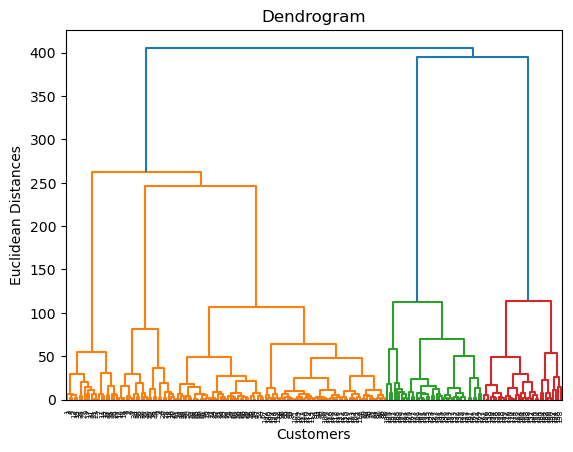

In [5]:
import scipy.cluster.hierarchy as sch
dendro=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df['Genre']=LabelEncoder().fit_transform(df["Genre"])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [40]:
from warnings import simplefilter 
simplefilter(action='ignore',category=FutureWarning)
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
y_hc =hc.fit_predict(x)

In [30]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


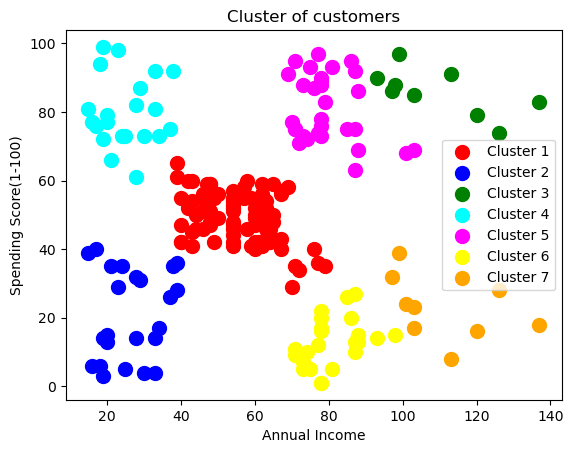

In [41]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(x[y_hc==5,0],x[y_hc==5,1],s=100,c='yellow',label='Cluster 6')
plt.scatter(x[y_hc==6,0],x[y_hc==6,1],s=100,c='orange',label='Cluster 7')
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# # K means Algorithm using elbow method 

It is used over hierarchial clustering since the clustering cannot be undone in it

In [42]:
import seaborn as sns
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0.5, 0, 'Score')

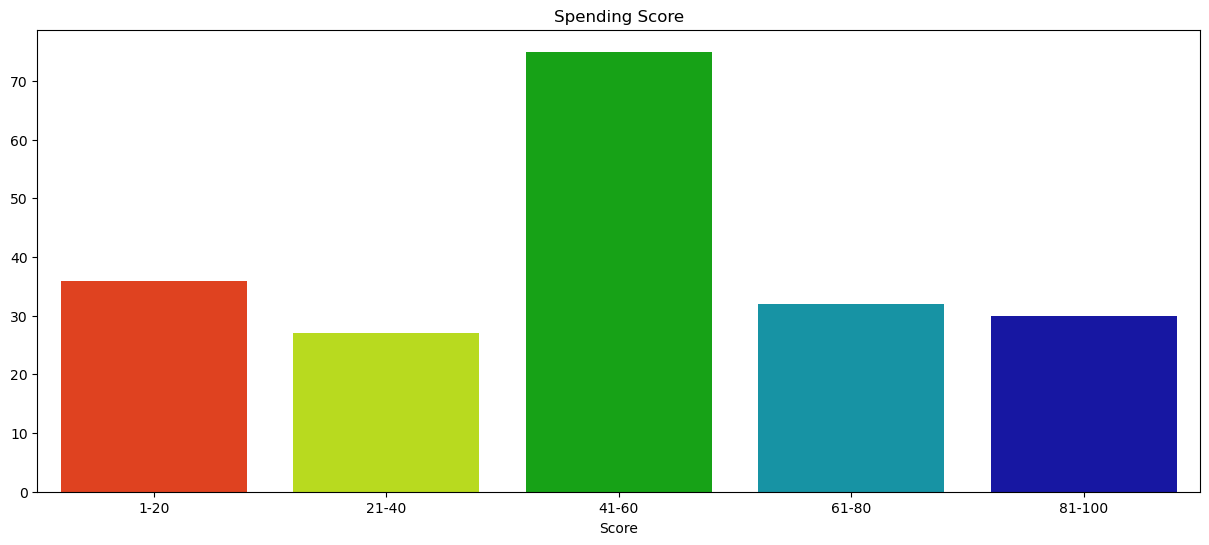

In [45]:
ss1_20 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"]<= 20)]
ss21_40 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"]<= 40)]
ss41_60 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"]<= 60)]
ss61_80 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"]<= 80)]
ss81_100 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"]<= 100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss1_20.values), len(ss21_40.values), len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Score")
plt.xlabel("Score")


In [54]:
x = df_encoded[['Annual Income (k$)','Spending Score (1-100)']]
k_means =KMeans(n_clusters=5,random_state=42)
y_means =k_means.fit_predict(x)
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

C:\Users\merly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


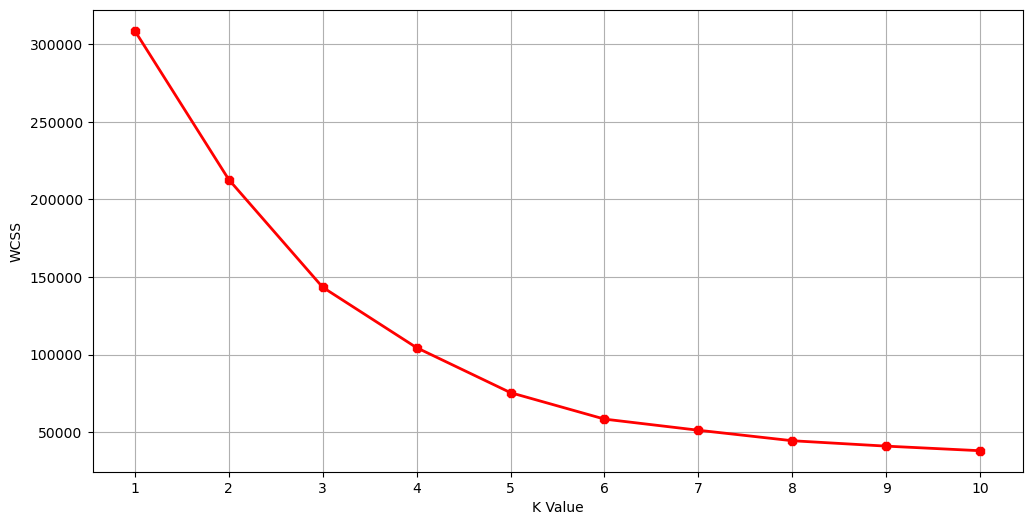

In [52]:
from sklearn.cluster import KMeans
df_encoded =pd.get_dummies(df)
WCSS =[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df_encoded.iloc[:,1:])
    WCSS.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),WCSS,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

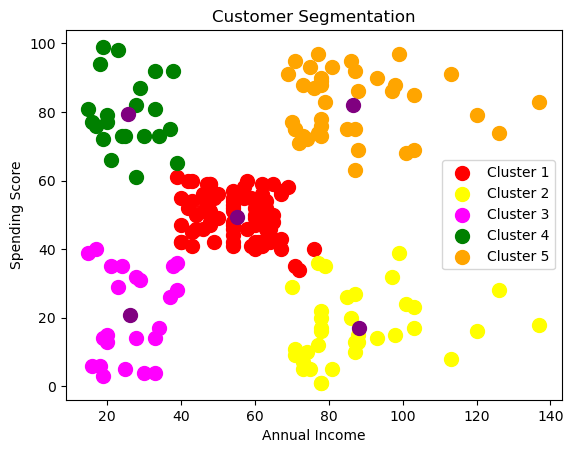

In [55]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c='yellow',label='Cluster 2')
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c='magenta',label='Cluster 3')
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c='orange',label='Cluster 5')
#plt.scatter(x.iloc[y_means==5,0],x.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="purple")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()